In [18]:
import tensorflow as tf 
import numpy as np

import matplotlib.pyplot as plt  

from tensorflow.keras import models, layers

In [19]:
#Data input pipeline and data preprocessing

img_size=200
batch_size=10
num_channels=3
dt=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dev Projects/AI_Projects/UVA Bootcamp/data/Cell_images',
    shuffle=True,
    batch_size=batch_size,
    image_size=(img_size, img_size),
   
  
)

Found 100 files belonging to 2 classes.


In [20]:
#Class names

class_names=dt.class_names

print(class_names)
print(len(dt))




['Parasitized', 'Uninfected']
10


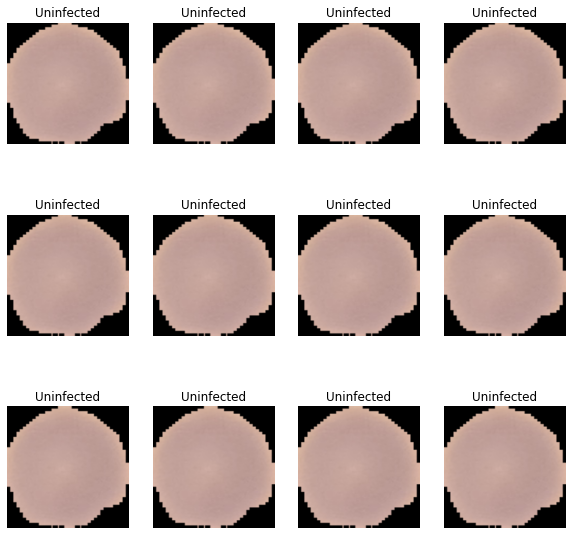

In [21]:
#displaying sample imgs
plt.figure(figsize=(10,10))
for img_batch, label_batch in dt.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(img_batch[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])

In [22]:
#function to split the dataset into train and testing
def split_dt(ds,train_split=0.70, test_split=0.30, shuffle=True, shuffle_size=1000):
     assert(train_split + test_split)==1
     
     ds_size=len(ds)
     
     if shuffle:
         ds=ds.shuffle(shuffle_size, seed=12)
     train_size=int(train_split* ds_size)
     test_size=int(test_split* ds_size)
     
     train_ds= ds.take(train_size)
     test_ds= ds.take(test_size)
     
     return train_ds, test_ds

In [23]:
train_ds, test_ds=split_dt(dt)


In [24]:
print(len(train_ds))
print(len(test_ds))

7
3


In [25]:
#Building the model

#This neural network accepts images of 200 by 200
#the resize_to_rescale function serves purpose for image resizing or rescaling

resize_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(img_size, img_size),
        layers.experimental.preprocessing.Rescaling(1.0/200)
    ]
)


#model architechture
num_classes=2
channels=3
input_shape=(batch_size,img_size,img_size,channels)


model=models.Sequential(
    [
        resize_rescale,
        layers.Conv2D(16, kernel_size=(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
        
        
        
        
    ]
)

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (10, 200, 200, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (10, 198, 198, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPooling  (10, 99, 99, 16)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (10, 97, 97, 32)          4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (10, 48, 48, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (10, 46, 46, 32)         

In [26]:
#model compilation and training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.fit(
    train_ds,
    epochs=20,
    batch_size=batch_size
   
    
)

Epoch 1/20
7/7 [==============================] - 2s 135ms/step - loss: 0.6980 - accuracy: 0.5571
Epoch 2/20
7/7 [==============================] - 1s 157ms/step - loss: 0.7010 - accuracy: 0.5143
Epoch 3/20
7/7 [==============================] - 2s 253ms/step - loss: 0.6692 - accuracy: 0.5571
Epoch 4/20
7/7 [==============================] - 2s 251ms/step - loss: 0.6391 - accuracy: 0.5714
Epoch 5/20
7/7 [==============================] - 2s 225ms/step - loss: 0.5038 - accuracy: 0.8286
Epoch 6/20
7/7 [==============================] - 2s 202ms/step - loss: 0.6561 - accuracy: 0.6143
Epoch 7/20
7/7 [==============================] - 2s 206ms/step - loss: 0.5246 - accuracy: 0.7429
Epoch 8/20
7/7 [==============================] - 2s 215ms/step - loss: 0.4327 - accuracy: 0.7857
Epoch 9/20
7/7 [==============================] - 1s 193ms/step - loss: 0.3291 - accuracy: 0.9143
Epoch 10/20
7/7 [==============================] - 1s 192ms/step - loss: 0.2984 - accuracy: 0.8714
Epoch 11/20
7/7 [==

In [27]:
#saving the model

model.save('./smear_analyser_tf_model')

INFO:tensorflow:Assets written to: ./smear_analyser_tf_model\assets


In [28]:
from PIL import Image
from tensorflow import keras


def predict_img(img_pth):
    print(" Image Prediction in progress")
    image_dt=Image.open(img_pth)
    
    
    
    img=tf.keras.preprocessing.image.img_to_array(image_dt)
    
    
    img=np.expand_dims(img, axis=0)
    
    #making predictions on input image
    
    pred=model.predict(img)
    pred=pred.argmax(axis=1)[0]
    
    if (pred==0):
        ans=print(" Positive for malaria")
    elif(pred==1):
        ans=print("Negative for malaria")
    
    return ans
    
    
    
    

In [29]:
def load_img(image):
    image=Image.open(image)
    return image

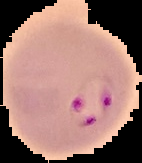

In [30]:
load_img('D:/Dev Projects/AI_Projects/Blood Smear Code/cell_images/Train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

In [31]:
predict_img('D:/Dev Projects/AI_Projects/Blood Smear Code/cell_images/Train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

 Image Prediction in progress
 Positive for malaria
